In [37]:
# Imports
import pandas
import numpy
from datetime import datetime
import matplotlib.pyplot as plt

In [38]:
# Import the CSV into dataframe
dataframe=pandas.read_csv('data.csv', sep=',',header=0)
dataframe = dataframe[:-1]

In [39]:
# Parse Year of Birth
dataframe["year_of_birth"] = pandas.DatetimeIndex(dataframe["BIRTH DATE"]).year.astype(int)

# Change all unknown locations of death to "Living"
dataframe["LOCATION OF DEATH"].fillna('Living', inplace=True)

# Creating variable "most_recent_date_living" to calculate lived_dates, lived_months and lived_years.
# This was done to include currently living Presidents as well, since their death dates come as NaN in the dataset.
today_date = datetime.now().strftime("%b %d, %Y")
dataframe["most_recent_date_living"] = dataframe["DEATH DATE"]
dataframe["most_recent_date_living"].fillna(today_date, inplace=True)

# Calculating lived_dates, lived_months and lived_years
difference_in_dates = pandas.DatetimeIndex(dataframe["most_recent_date_living"]) - pandas.DatetimeIndex(dataframe["BIRTH DATE"])
dataframe["lived_days"] = (difference_in_dates/ numpy.timedelta64(1, "D"))
dataframe["lived_months"] = difference_in_dates / numpy.timedelta64(1, "M")
dataframe["lived_years"] = difference_in_dates / numpy.timedelta64(1, "Y")

# Since calculations are now done, replace NaN death date values with "Living".
dataframe["DEATH DATE"].fillna('Living', inplace=True)


In [40]:
# Function to return style to highlight living presidents.
def highlight_living(s):
    if s['DEATH DATE'] == 'Living':
        return ['background-color: #55efc4'] * len(s)
    else:
        return ['background-color: transparent'] * len(s)

In [41]:
# Sorting data by lived days in dsecending order, and then picking the top 10.
top_10_oldest_df = dataframe.sort_values("lived_days", ascending=False).head(10)
# Converting lived years to integer
top_10_oldest_df["lived_years"] = top_10_oldest_df["lived_years"].astype(int)
# Changing lived_years column name to AGE
top_10_oldest_df.rename(columns={"lived_years": "AGE"}, inplace=True)

top_10_oldest = top_10_oldest_df.style
# Hide index
top_10_oldest.hide_index()
# Hide columns we used as variables
top_10_oldest.hide_columns(["most_recent_date_living","year_of_birth", "lived_days", "lived_months"])
# Highlight living presidents
top_10_oldest.apply(highlight_living, axis=1)
# Set title of the table
top_10_oldest.set_caption("Top 10 Presidents of the United States by age lived, oldest first")
# Show the table
top_10_oldest

PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,AGE
Jimmy Carter,"Oct 1, 1924","Plains, Georgia",Living,Living,97
George Bush,"June 12, 1924","Milton, Mass.","Nov 30, 2018","Houston, Texas",94
Gerald Ford,"July 14, 1913","Omaha, Nebraska","Dec 26, 2006","Rancho Mirage, Cal.",93
Ronald Reagan,"Feb 6, 1911","Tampico, Illinois","June 5, 2004","Los Angeles, Cal.",93
John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",90
Herbert Hoover,"Aug 10, 1874","West Branch, Iowa","Oct 20, 1964","New York, New York",90
Harry S. Truman,"May 8, 1884","Lamar, Missouri","Dec 26, 1972","Kansas City, Missouri",88
James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",85
Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",83
Richard Nixon,"Jan 9, 1913","Yorba Linda, Cal.","Apr 22, 1994","New York, New York",81


In [42]:
top_10_youngest_df = dataframe.sort_values("lived_days", ascending=True).head(10)
top_10_youngest_df["lived_years"] = top_10_youngest_df["lived_years"].astype(int)
top_10_youngest_df.rename(columns={"lived_years": "AGE"}, inplace=True)

top_10_youngest = top_10_youngest_df.style
top_10_youngest.hide_index()
top_10_youngest.hide_columns(["most_recent_date_living", "year_of_birth", "lived_months", "lived_days"])
top_10_youngest.apply(highlight_living, axis=1)
top_10_youngest.set_caption("Top 10 Presidents of the United States by age lived, youngest first")
top_10_youngest

PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,AGE
John F. Kennedy,"May 29, 1917","Brookline, Mass.","Nov 22, 1963","Dallas, Texas",46
James A. Garfield,"Nov 19, 1831","Cuyahoga Co., Ohio","Sep 19, 1881","Elberon, New Jersey",49
James K. Polk,"Nov 2, 1795","Mecklenburg Co., N.C.","June 15, 1849","Nashville, Tennessee",53
Abraham Lincoln,"Feb 12, 1809","LaRue Co., Kentucky","Apr 15, 1865","Washington, D.C.",56
Chester Arthur,"Oct 5, 1829","Fairfield, Vermont","Nov 18, 1886","New York, New York",57
Warren G. Harding,"Nov 2, 1865","Morrow County, Ohio","Aug 2, 1923","San Francisco, Cal.",57
William McKinley,"Jan 29, 1843","Niles, Ohio","Sep 14, 1901","Buffalo, New York",58
Theodore Roosevelt,"Oct 27, 1858","New York, New York","Jan 6, 1919","Oyster Bay, New York",60
Barack Obama,"Aug 4, 1961","Honolulu, Hawaii",Living,Living,60
Calvin Coolidge,"July 4, 1872","Plymouth, Vermont","Jan 5, 1933","Northampton, Mass.",60


In [43]:
# Extracting necessary cols
lived_days_col = dataframe["lived_days"]
lived_years_col = dataframe["lived_years"].astype(int)
value_counts = lived_years_col.value_counts()

# Calculating weights
weights = []
for i in range(len(lived_years_col)):
    year = lived_years_col[i]
    # Using the frequency of a year as the weight
    weights.append(value_counts[year])
weights = numpy.array(weights)
# Getting weighted values
weighted_values = weights * lived_days_col

# Calculating the statistics
mean = lived_days_col.mean()
weighted_mean = weighted_values.sum() / weights.sum()
median = lived_days_col.median()
mode = lived_years_col.mode() * 365
max = lived_days_col.max()
min = lived_days_col.min()
std = lived_days_col.std()

# Tabularizing by appending everything to a dictionary
data = {
    "Statistic": ["Mean Age", "Weighted Mean Age", "Median Age", "Mode Age", "Maximum Age", "Minimum Age", "Standard Deviation"],
    "Age (Days)": [mean, weighted_mean, median, list(mode), max, min, std],
    "Age (Years)": [mean / 365, weighted_mean / 365, median / 365, [x / 365 for x in list(mode)], max / 365, min / 365, std / 365]
}

# Creating dataframe from the dictionary
dataframe_stats = pandas.DataFrame.from_dict(data)
dataframe_stats.style.hide_index()


Statistic,Age (Days),Age (Years)
Mean Age,26366.711111,72.237565
Weighted Mean Age,26240.209877,71.890986
Median Age,26227.000000,71.854795
Mode Age,"[21900, 24455, 27375, 28470]","[60.0, 67.0, 75.0, 78.0]"
Maximum Age,35443.000000,97.104110
Minimum Age,16978.000000,46.515068
Standard Deviation,4564.903761,12.506586


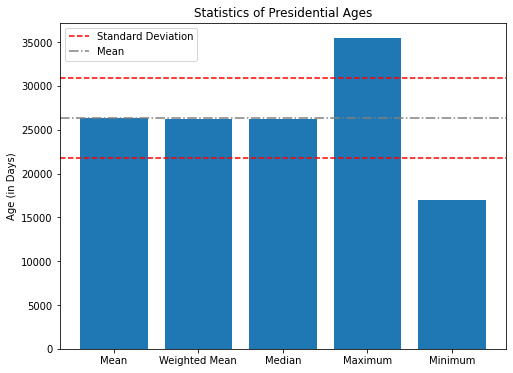

In [44]:
# Plotting the data using matplotlib

x_axis = ["Mean", "Weighted Mean", "Median", "Maximum", "Minimum"]
x_axis_positions = range(len(x_axis))
y_axis = [mean, weighted_mean, median, max, min]
plt.figure(figsize=(8, 6))
plt.bar(x_axis_positions, y_axis)
plt.ylabel("Age (in Days)")
plt.title("Statistics of Presidential Ages")

plt.axhline(y = mean + std, color = 'r', linestyle = '--', label='Standard Deviation')
plt.axhline(y = mean, color = 'gray', linestyle = '-.', label='Mean')
plt.axhline(y = mean - std, color = 'r', linestyle = '--')

plt.legend(labels=['Standard Deviation', 'Mean'])

plt.xticks(x_axis_positions, x_axis)
plt.show()

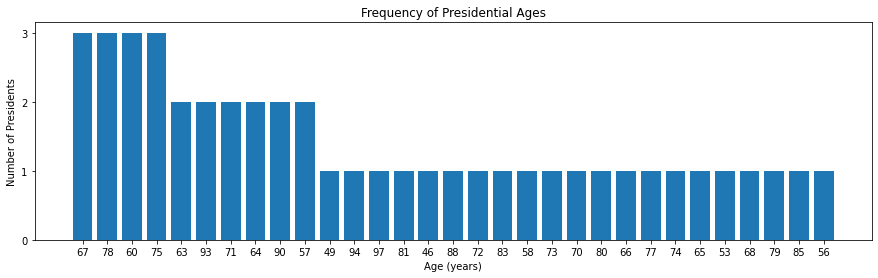

In [45]:
# Plotting frequency distribution using matplotlib
x_axis_positions = [i for i in range(len(value_counts))]
plt.figure(figsize=(15, 4))
plt.bar(x_axis_positions, value_counts)
plt.xlabel("Age (years)")
plt.ylabel("Number of Presidents")
plt.title("Frequency of Presidential Ages")

plt.xticks(x_axis_positions, value_counts.keys())
plt.yticks(range(value_counts.max() + 1))
plt.show()